In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# the columns have no headers, so they are set accordingly
data = pd.read_csv('einkommen.train')
data.columns = ['Age','Employment type','Weighting factor','Education','Schooling/training period', 'Marital status','Employment area', 'Partnership','Ethnicity', 'Gender', 'Gains on financial assets', 'Losses on financial assets',  'Weekly working time', 'Country of birth', 'Income']
data.head()

,Age,Employment type,Weighting factor,Education,Schooling/training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Gains on financial assets,Losses on financial assets,Weekly working time,Country of birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Data Analysis

In [3]:
data.shape

(29999, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         29999 non-null  int64 
 1   Employment type             29999 non-null  object
 2   Weighting factor            29999 non-null  int64 
 3   Education                   29999 non-null  object
 4   Schooling/training period   29999 non-null  int64 
 5   Marital status              29999 non-null  object
 6   Employment area             29999 non-null  object
 7   Partnership                 29999 non-null  object
 8   Ethnicity                   29999 non-null  object
 9   Gender                      29999 non-null  object
 10  Gains on financial assets   29999 non-null  int64 
 11  Losses on financial assets  29999 non-null  int64 
 12  Weekly working time         29999 non-null  int64 
 13  Country of birth            29999 non-null  ob

In [5]:
# Total number of records
n_records = data.shape[0]

# Total number of features
n_features = data.shape[1]

# Number of records where individual's income is more than $50,000
over_50k = data[data['Income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
less_50k = data[data['Income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (over_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(over_50k))
print("Individuals making at most $50k: {}".format(less_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 29999
Total number of features: 15
Individuals making more than $50k: 3778
Individuals making at most $50k: 1221
Percentage of individuals making more than $50k: 12.59%


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,29999.0,38.582453,13.647975,17.0,28.0,37.0,48.0,90.0
Weighting factor,29999.0,189771.251875,105441.775914,12285.0,117833.0,178478.0,236939.0,1484705.0
Schooling/training period,29999.0,10.079636,2.572223,1.0,9.0,10.0,12.0,16.0
Gains on financial assets,29999.0,1091.650588,7467.510668,0.0,0.0,0.0,0.0,99999.0
Losses on financial assets,29999.0,86.624087,401.535593,0.0,0.0,0.0,0.0,4356.0
Weekly working time,29999.0,40.431948,12.313299,1.0,40.0,40.0,45.0,99.0


In [7]:
data.describe(include = [object]).T

,count,unique,top,freq
Employment type,29999,9,Private,20901
Education,29999,16,HS-grad,9692
Marital status,29999,7,Married-civ-spouse,13768
Employment area,29999,15,Prof-specialty,3802
Partnership,29999,6,Husband,12138
Ethnicity,29999,5,White,25635
Gender,29999,2,Male,20069
Country of birth,29999,42,United-States,26870
Income,29999,3,?,25000


In [8]:
# analysing the information of those employees whose income is known
no_income = data[data['Income']== ' ?']
with_income = data[data['Income'] != ' ?']

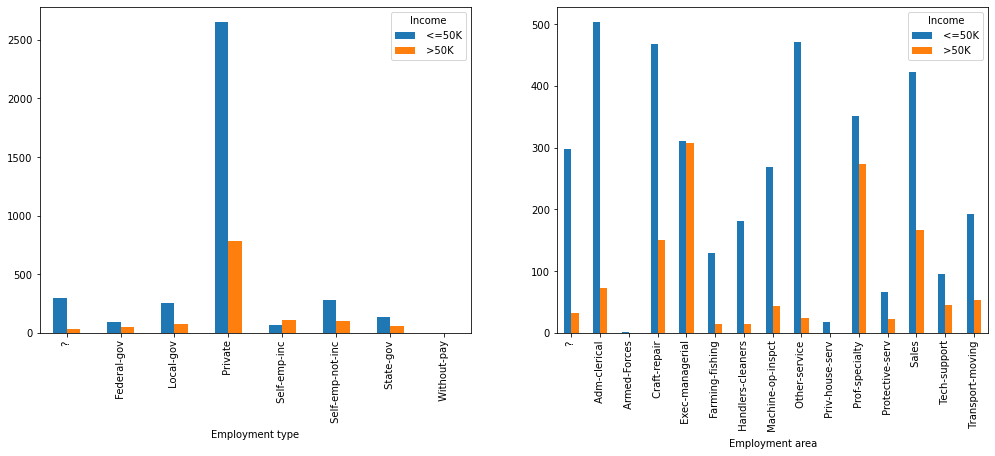

In [9]:
# ? represent missing values
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
pd.crosstab(with_income['Employment type'], with_income['Income']).plot(kind = 'bar', ax = ax)
ax = fig.add_subplot(1,2,2)
pd.crosstab(with_income['Employment area'], with_income['Income']).plot(kind = 'bar', ax = ax)
plt.show()

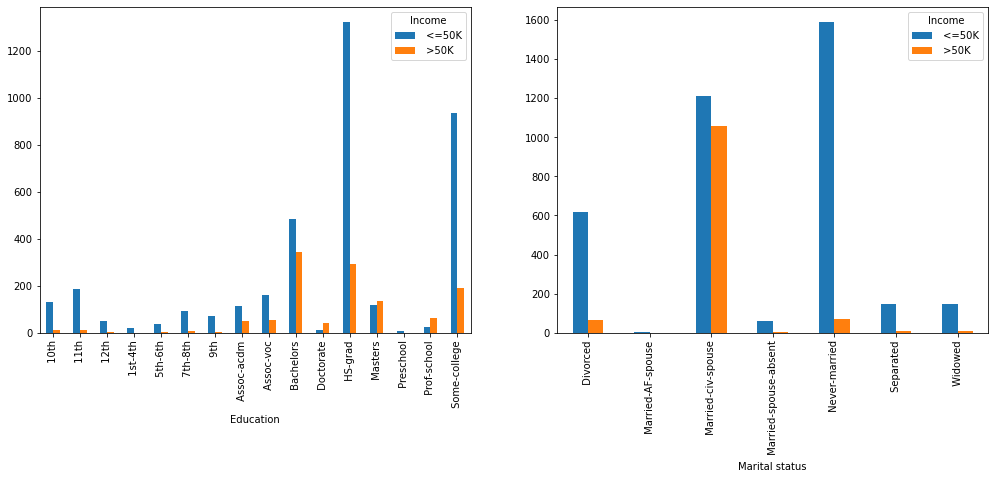

In [10]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
pd.crosstab(with_income['Education'], with_income['Income']).plot(kind = 'bar', ax = ax)
ax = fig.add_subplot(1,2,2)
pd.crosstab(with_income['Marital status'], with_income['Income']).plot(kind = 'bar', ax = ax)
plt.show()

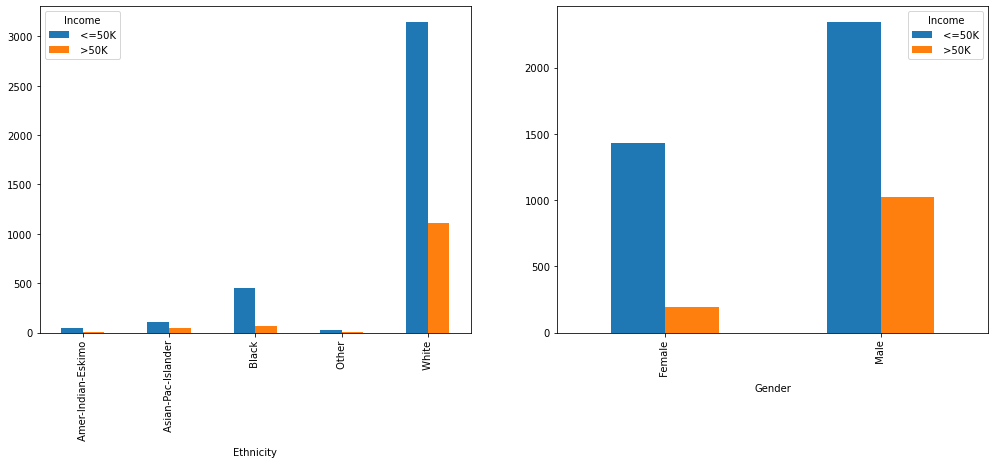

In [11]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
pd.crosstab(with_income['Ethnicity'], with_income['Income']).plot(kind = 'bar', ax = ax)
ax = fig.add_subplot(1,2,2)
pd.crosstab(with_income['Gender'], with_income['Income']).plot(kind = 'bar', ax = ax)
plt.show()

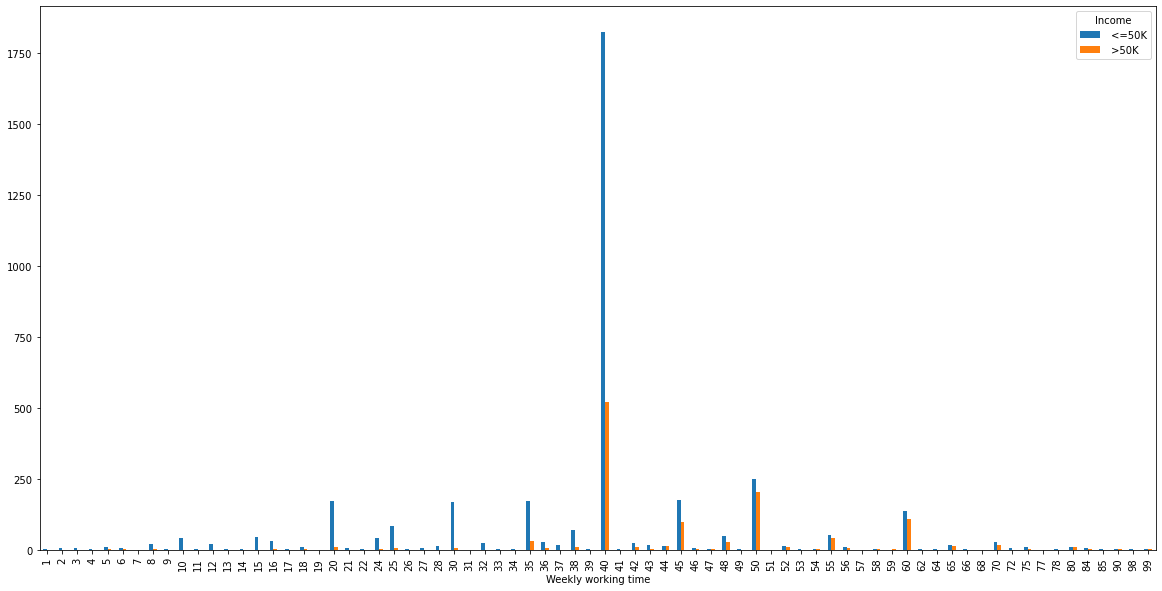

In [12]:
pd.crosstab(with_income['Weekly working time'], with_income['Income']).plot(kind = 'bar', figsize = (20, 10))
plt.show()

### Data Preprocessing

In [13]:
# checking missing values
data.isin([' ?']).sum()

Age                               0
Employment type                1677
Weighting factor                  0
Education                         0
Schooling/training period         0
Marital status                    0
Employment area                1682
Partnership                       0
Ethnicity                         0
Gender                            0
Gains on financial assets         0
Losses on financial assets        0
Weekly working time               0
Country of birth                539
Income                        25000
dtype: int64

In [14]:
# checking the most common values
data['Employment type'].mode()

0     Private
dtype: object

In [15]:
data['Employment area'].mode()

0     Prof-specialty
dtype: object

In [16]:
data['Country of birth'].mode()

0     United-States
dtype: object

In [17]:
# replacing ' ?' with the most common value of each column
data['Employment type'] = data['Employment type'].replace(' ?', 'Private')
data['Employment area'] = data['Employment area'].replace(' ?', 'Prof-specialty')
data['Country of birth'] = data['Country of birth'].replace(' ?', 'United-States')

In [18]:
# checking if the replacement took place
data.isin([' ?']).sum()

Age                               0
Employment type                   0
Weighting factor                  0
Education                         0
Schooling/training period         0
Marital status                    0
Employment area                   0
Partnership                       0
Ethnicity                         0
Gender                            0
Gains on financial assets         0
Losses on financial assets        0
Weekly working time               0
Country of birth                  0
Income                        25000
dtype: int64

In [19]:
# categorical to numeric
data['Gender'] = data['Gender'].replace({" Female": 0, " Male": 1})
data['Income'] = data['Income'].replace({" <=50K": 0, " >50K": 1})

data.head()

,Age,Employment type,Weighting factor,Education,Schooling/training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Gains on financial assets,Losses on financial assets,Weekly working time,Country of birth,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0


In [20]:
# normalisation with Min-Max scaling

from sklearn.preprocessing import MinMaxScaler    

numerics = data.select_dtypes(np.number)

scaler = MinMaxScaler()
new_data_scaled= pd.DataFrame(scaler.fit_transform(numerics), columns=numerics.columns)
new_data_scaled.head()

,Age,Weighting factor,Schooling/training period,Gender,Gains on financial assets,Losses on financial assets,Weekly working time
0,0.452055,0.048238,0.800000,1.0,0.0,0.0,0.122449
1,0.287671,0.138113,0.533333,1.0,0.0,0.0,0.397959
2,0.493151,0.151068,0.400000,1.0,0.0,0.0,0.397959
3,0.150685,0.221488,0.800000,0.0,0.0,0.0,0.397959
4,0.273973,0.184932,0.866667,0.0,0.0,0.0,0.397959


In [21]:
data_prep = data.copy()

In [22]:
# dropping 'Income' to conduct one hot encoding
data_prep.drop('Income', axis = 1, inplace=True)

In [23]:
# one hot encoding to convert categorical data to indicator variables
data_prep = pd.get_dummies(data_prep)
data_prep.head()

,Age,Weighting factor,Schooling/training period,Gender,Gains on financial assets,Losses on financial assets,Weekly working time,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,...,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Country of birth_United-States
0,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# dropping columns to add their normalized version
data_prep = data_prep.drop(['Age', 'Weighting factor', 'Schooling/training period', 'Gains on financial assets', 'Losses on financial assets', 'Weekly working time'], axis = 1)

data_prep

,Gender,Employment type_ Federal-gov,Employment type_ Local-gov,Employment type_ Never-worked,Employment type_ Private,Employment type_ Self-emp-inc,Employment type_ Self-emp-not-inc,Employment type_ State-gov,Employment type_ Without-pay,Employment type_Private,...,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Country of birth_United-States
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29997,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# merging the two dataframes
new_df = pd.merge(new_data_scaled, data_prep, left_index=True, right_index=True)
new_df['Income'] = data['Income']
new_df.head()

,Age,Weighting factor,Schooling/training period,Gender_x,Gains on financial assets,Losses on financial assets,Weekly working time,Gender_y,Employment type_ Federal-gov,Employment type_ Local-gov,...,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Country of birth_United-States,Income
0,0.452055,0.048238,0.800000,1.0,0.0,0.0,0.122449,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.287671,0.138113,0.533333,1.0,0.0,0.0,0.397959,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.493151,0.151068,0.400000,1.0,0.0,0.0,0.397959,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.150685,0.221488,0.800000,0.0,0.0,0.0,0.397959,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.273973,0.184932,0.866667,0.0,0.0,0.0,0.397959,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Data Splitting

In [26]:
without_income = new_df[new_df['Income']== ' ?'] # samples for predicting
with_income = new_df[new_df['Income']!= ' ?']  # samples for train and test
x = with_income[with_income.columns[:-1]]
y = with_income[with_income.columns[-1]]
y = y.astype('int')

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, Y_train)

pred_test = lr.predict(X_test)

In [29]:
print("Accuracy on test data: ", lr.score(X_test, Y_test))
print("Confusion Matrix Testing:\n", confusion_matrix(Y_test, pred_test))

Accuracy on test data:  0.84
Confusion Matrix Testing:
 [[1050   71]
 [ 169  210]]


In [30]:
from sklearn.model_selection import cross_val_score
# cross_val_score evaluates the given model using 5-fold(default) cross-validation
cross_val_lr = cross_val_score(lr, X_test, Y_test)
# the mean classification accuracy
cross_val_lr_mean = cross_val_lr.mean()

print('results: ', cross_val_lr)
print('mean: ', cross_val_lr_mean)

results:  [0.81666667 0.82333333 0.87       0.81333333 0.84      ]
mean:  0.8326666666666668


In [31]:
# C - inverse of regularization, smaller value provide stronger regularization
param_grid = {'C': [0.1, 0.4, 0.7, 1, 4, 7, 10]}
grid_lr = GridSearchCV(lr, param_grid)
grid_lr.fit(X_train, Y_train)
print("Logistic Regression: ", grid_lr.best_params_)

Logistic Regression:  {'C': 10}


In [32]:
# using best hyperparameter
best_lr = LogisticRegression(C = 10, max_iter = 10000)

In [33]:
best_lr.fit(X_train, Y_train)
best_y_test_pred_lr = best_lr.predict(X_test)

In [34]:
print("Accuracy on test data: ", best_lr.score(X_test, Y_test))
print("Confusion Matrix Testing:\n", confusion_matrix(Y_test, best_y_test_pred_lr))

Accuracy on test data:  0.846
Confusion Matrix Testing:
 [[1048   73]
 [ 158  221]]


In [35]:
best_cross_val_lr = cross_val_score(best_lr, X_test, Y_test)
# the mean classification accuracy
best_cross_val_lr_mean = best_cross_val_lr.mean()
print('results: ', best_cross_val_lr)
print('mean: ', best_cross_val_lr_mean)

results:  [0.82       0.84       0.87666667 0.85666667 0.84666667]
mean:  0.8480000000000001


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
y_test_pred = rf.predict(X_test)

In [37]:
print("confusion matrix for test:\n", confusion_matrix(Y_test, y_test_pred))
print("accuracy test:", accuracy_score(Y_test, y_test_pred))

confusion matrix for test:
 [[1046   75]
 [ 161  218]]
accuracy test: 0.8426666666666667


In [38]:
# corss validation
results_rf = cross_val_score(rf, X_test, Y_test)
results_mean_rf = results_rf.mean()
print('results: ', results_rf)
print('mean: ', results_mean_rf)

results:  [0.81333333 0.79666667 0.84       0.82666667 0.81      ]
mean:  0.8173333333333332


In [39]:
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, None]}
grid_rf = GridSearchCV(rf, param_grid)
grid_rf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None]})

In [40]:
print("Random Forest: ", grid_rf.best_params_)

Random Forest:  {'max_depth': 10}


In [41]:
best_rf = RandomForestClassifier(max_depth = 10, random_state = 42)
best_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [42]:
best_y_test_pred = best_rf.predict(X_test)

In [43]:
print("confusion matrix for test:\n", confusion_matrix(Y_test, best_y_test_pred))
print("accuracy test: ", accuracy_score(Y_test,best_y_test_pred))

confusion matrix for test:
 [[1085   36]
 [ 190  189]]
accuracy test:  0.8493333333333334


In [44]:
# corss validation
best_results_rf = cross_val_score(best_rf, X_test, Y_test)
best_results_mean_rf = best_results_rf.mean()
print('results: ', best_results_rf)
print('mean: ', best_results_mean_rf)

results:  [0.83333333 0.83666667 0.86       0.83       0.83666667]
mean:  0.8393333333333333


### SVM

In [45]:
from sklearn import svm
svm_ = svm.SVC()
svm_.fit(X_train, Y_train)
Y_test_pred_svm = svm_.predict(X_test)

In [46]:
print("confusion matrix for test:\n", confusion_matrix(Y_test, Y_test_pred_svm))
print("accuracy test: ", accuracy_score(Y_test,Y_test_pred_svm))

confusion matrix for test:
 [[1055   66]
 [ 189  190]]
accuracy test:  0.83


In [47]:
# cross validation without hyperparameter tuning
results_svm = cross_val_score(svm_, X_test, Y_test)
results_mean_svm = results_svm.mean()
print('results: ', results_svm)
print('mean: ', results_mean_svm)

results:  [0.82       0.81333333 0.84333333 0.8        0.80666667]
mean:  0.8166666666666667


In [48]:
# hyperparameter tuning
param_grid = {'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(svm_, param_grid, refit=True, verbose=2)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   1.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=10, gamma=0.01, total=   0.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.1min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

In [49]:
grid.best_params_

{'C': 10, 'gamma': 0.01}

In [50]:
svm_best = svm.SVC(C = 10, gamma = 0.01, random_state=42)

In [51]:
svm_best.fit(X_train, Y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [52]:
y_pred_test_svm_best = svm_best.predict(X_test)
print("confusion matrix for test:\n", confusion_matrix(Y_test, y_pred_test_svm_best))
print("accuracy test: ", accuracy_score(Y_test,y_pred_test_svm_best))

confusion matrix for test:
 [[1062   59]
 [ 184  195]]
accuracy test:  0.838


In [53]:
# cross validation with best hyperparameter
best_results_svm = cross_val_score(svm_best, X_test, Y_test)
best_results_mean_svm = best_results_svm.mean()
print('results: ', best_results_svm)
print('mean: ', best_results_mean_svm)

results:  [0.83333333 0.82333333 0.87       0.81333333 0.79666667]
mean:  0.8273333333333334


### Decision Tree

In [54]:
from sklearn import tree
# controlling the depth
decTree = tree.DecisionTreeClassifier()
decTree.fit(X_train,Y_train)
Y_test_pred_decTree = decTree.predict(X_test)

In [55]:
print("confusion matrix for test:\n", confusion_matrix(Y_test, Y_test_pred_decTree))
print("accurray test:", accuracy_score(Y_test,Y_test_pred_decTree))

confusion matrix for test:
 [[991 130]
 [153 226]]
accurray test: 0.8113333333333334


In [56]:
results_decTree = cross_val_score(decTree, X_test, Y_test)
results_mean_decTree = results_decTree.mean()
print('results: ', results_decTree)
print('mean: ', results_mean_decTree)

results:  [0.73666667 0.78333333 0.82       0.78666667 0.80666667]
mean:  0.7866666666666666


In [57]:
param = {'max_depth': [2, 3, 5, 10, 20]}
grid_decTree = GridSearchCV(decTree, param)
grid_decTree.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10, 20]})

In [58]:
print("Decision Tree: ", grid_decTree.best_params_)

Decision Tree:  {'max_depth': 5}


In [59]:
best_decTree = tree.DecisionTreeClassifier(max_depth = 5)
best_decTree.fit(X_train,Y_train)
best_y_test_pred_decTree = best_decTree.predict(X_test)

In [60]:
print("confusion matrix for test:\n", confusion_matrix(Y_test, best_y_test_pred_decTree))
print("accurray test:", accuracy_score(Y_test,best_y_test_pred_decTree))

confusion matrix for test:
 [[1066   55]
 [ 182  197]]
accurray test: 0.842


In [61]:
best_results_decTree = cross_val_score(best_decTree, X_test, Y_test)
best_results_mean_decTree = best_results_decTree.mean()
print('results: ', best_results_decTree)
print('mean: ', best_results_mean_decTree)

results:  [0.78       0.81666667 0.83333333 0.83666667 0.84666667]
mean:  0.8226666666666667


In [62]:
print('Mean of LR without tuning:                   ', cross_val_lr_mean)
print('Mean of LR with tuning:                      ', best_cross_val_lr_mean)
print('----------------------------------------------------------------')
print('Mean of RF without tuning:                   ', results_mean_rf)
print('Mean of RF with tuning:                      ', best_results_mean_rf)
print('----------------------------------------------------------------')
print('Mean of SVM without tuning:                  ', results_mean_svm)
print('Mean of SVM with tuning:                     ', best_results_mean_svm)
print('----------------------------------------------------------------')
print('Mean of DT without tuning:                   ', results_mean_decTree)
print('Mean of DT with tuning:                      ', best_results_mean_decTree)

Mean of LR without tuning:                    0.8326666666666668
Mean of LR with tuning:                       0.8480000000000001
----------------------------------------------------------------
Mean of RF without tuning:                    0.8173333333333332
Mean of RF with tuning:                       0.8393333333333333
----------------------------------------------------------------
Mean of SVM without tuning:                   0.8166666666666667
Mean of SVM with tuning:                      0.8273333333333334
----------------------------------------------------------------
Mean of DT without tuning:                    0.7866666666666666
Mean of DT with tuning:                       0.8226666666666667


### Predicting

In [63]:
# normalized and encoded data
without_income

,Age,Weighting factor,Schooling/training period,Gender_x,Gains on financial assets,Losses on financial assets,Weekly working time,Gender_y,Employment type_ Federal-gov,Employment type_ Local-gov,...,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Country of birth_United-States,Income
4999,0.410959,0.045736,0.933333,1.0,0.278283,0.000000,0.500000,1,0,0,...,0,0,0,0,0,1,0,0,0,?
5000,0.520548,0.094531,0.800000,0.0,0.000000,0.365014,0.377551,0,0,0,...,0,0,0,0,0,1,0,0,0,?
5001,0.123288,0.081754,0.533333,0.0,0.050131,0.000000,0.397959,0,0,0,...,0,0,0,0,0,1,0,0,0,?
5002,0.150685,0.101458,0.533333,0.0,0.000000,0.000000,0.397959,0,0,0,...,0,0,0,0,0,1,0,0,0,?
5003,0.260274,0.033999,0.533333,1.0,0.000000,0.000000,0.397959,1,0,0,...,0,0,0,0,0,1,0,0,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.178082,0.029337,0.866667,1.0,0.000000,0.000000,0.448980,1,0,0,...,0,0,0,0,0,0,0,0,0,?
29995,0.424658,0.072796,0.666667,1.0,0.000000,0.000000,0.561224,1,0,0,...,0,0,0,0,0,0,0,0,0,?
29996,0.602740,0.105311,0.600000,1.0,0.000000,0.000000,0.346939,1,0,1,...,0,0,0,0,0,1,0,0,0,?
29997,0.328767,0.116878,0.533333,1.0,0.000000,0.000000,0.397959,1,0,0,...,0,0,0,0,0,1,0,0,0,?


In [64]:
# dropping income from the preprocessed data
apply = without_income.drop('Income', axis = 1)
apply

,Age,Weighting factor,Schooling/training period,Gender_x,Gains on financial assets,Losses on financial assets,Weekly working time,Gender_y,Employment type_ Federal-gov,Employment type_ Local-gov,...,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia,Country of birth_United-States
4999,0.410959,0.045736,0.933333,1.0,0.278283,0.000000,0.500000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5000,0.520548,0.094531,0.800000,0.0,0.000000,0.365014,0.377551,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5001,0.123288,0.081754,0.533333,0.0,0.050131,0.000000,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5002,0.150685,0.101458,0.533333,0.0,0.000000,0.000000,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5003,0.260274,0.033999,0.533333,1.0,0.000000,0.000000,0.397959,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,0.178082,0.029337,0.866667,1.0,0.000000,0.000000,0.448980,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29995,0.424658,0.072796,0.666667,1.0,0.000000,0.000000,0.561224,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0.602740,0.105311,0.600000,1.0,0.000000,0.000000,0.346939,1,0,1,...,0,0,0,0,0,0,1,0,0,0
29997,0.328767,0.116878,0.533333,1.0,0.000000,0.000000,0.397959,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# chose logistic regression, since its CV average was the highest
output = best_lr.predict(apply)

In [66]:
# appending to the original dataframe(that has no income columns) the predicted income results
# replacing binary values with >50k and <=50k
no_income = no_income.drop('Income', axis = 1)
no_income['Income'] = output
no_income['Income'].replace({1: ' >50K', 0 : ' <=50K'}, inplace =True)
no_income.head()

,Age,Employment type,Weighting factor,Education,Schooling/training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Gains on financial assets,Losses on financial assets,Weekly working time,Country of birth,Income
4999,47,Self-emp-inc,79627,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,50,United-States,>50K
5000,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,0,1590,38,United-States,<=50K
5001,26,Private,132661,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,5013,0,40,United-States,>50K
5002,28,Private,161674,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
5003,36,Private,62346,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,<=50K


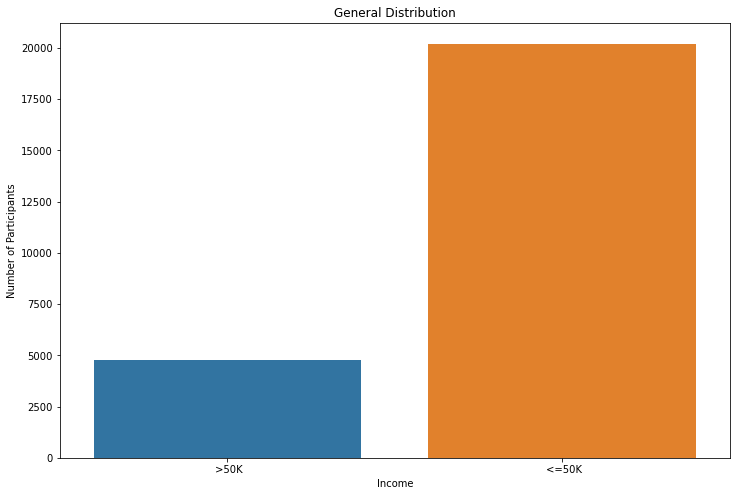

In [67]:
plt.figure(figsize = (12, 8))
sns.countplot(data = no_income, x = 'Income' )
plt.title("General Distribution")
plt.ylabel("Number of Participants")
plt.show()